МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Арсений Ашуха, ars.ashuha@gmail.com

In [1]:
# sudo pip install xgboost

In [3]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [17]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


<h1 align="center">Outline</h1> 

- Gardient Boosting
- Overfitting Gardient Boosting
    - Trees/Linear as base estimator
    - Regularization
    - Stohastic Gardient Boosting (Out of bag, step length)
- Compare with bagging
- Bossting and big number of features 
- eXtreme Gradient Boosting vs sklearn

<h1 align="center">Gradient Boosting</h1> 

### Градиентный спуск

Самый простой метод минимизации функции, для оптимизации в каждый момент времени двигаемся по антиградиенту функции с каким-то шагом. 


$$w_{n+1} = w_n - s \cdot \frac{\partial f}{\partial w}$$

### Градиентный бустинг

Теперь давайте представим, что на каждом шаге мы оптимизируем не параметры алгоритма $w$, а ответы нашего алгоритма $\hat{y}$.

**Обучение**: На каждом шаге, давайте предсказывать градиент на каждом объекте и "двигать" ответ в сторону улучшения (антиградиента).

**Как в итоге обучать**:
- Первый алгоритм отвечает константу 
- Добавляем базовые алгоритмы $b_i$, $i = 1, .., N$:
    - Вычисляем градиент функции потерь ПО ОТВЕТАМ $g_{i-1} = \frac{\partial L(\sum_{j=0}^{i-1} a_j b_j(x))}{\partial y}$ на каждом объекте  
    - Обучаем $b_i$ предсказывать текущий $g_{i-1}$
    - Подбираем $a_i$ -- одномерной минимизацией 
    - Дополняем композицию $\sum_{j=0}^{i-1} a_j b_j (x) + a_i b_i(x)$

---

<h1 align="center">Задачки</h1> 

1) В задаче классификации с двумя классами $Y = {+1, −1}$ разумным выбором является настройка функции $p_+(x) ∈ [0, 1]$, возвращающей вероятность класса +1. Как этом случае мы можем настроить модель?:

![](./img/logist1.png)
![](./img/logist2.png)

----

2) Как будет выглядеть задача поиска базового алгоритма $b_N(x)$ в случае с логистической функцией потерь?

![](./img/logist3.png)

----

<h1 align="center">Overfiеting and Regularization</h1> 


- Что будет, если первый классификатор хорошо предскажет все ответы?
- Переобучается ли бустинг в случае переобучения одного базового алгоритма?

### Сгенерируем данные 

In [18]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Zt = np.sin(np.sqrt(X**2 + Y**2))

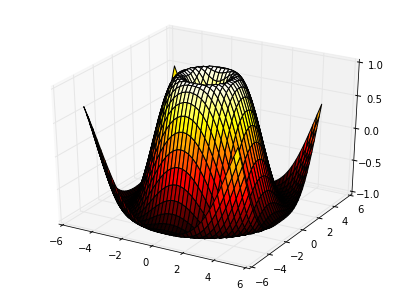

In [19]:
fig = plt.figure(figsize=(7, 5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Zt, rstride=1, cstride=1, cmap=cm.hot)

### Наложим шум

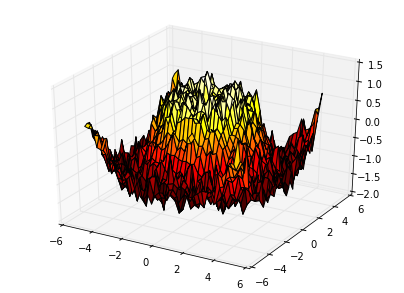

In [20]:
Z = Zt
Z += np.random.normal(size=X.shape)*0.2
fig = plt.figure(figsize=(7, 5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot)

### Тренируем AdaBoostRegressor

Каков будет результат?

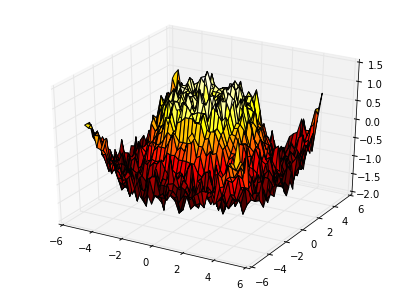

In [21]:
f1 = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(), 
    loss='exponential').fit(np.vstack(np.array([X, Y]).T), np.hstack(Z))

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Zf1 = f1.predict(np.vstack(np.array([X, Y]).T))

fig = plt.figure(figsize=(7, 5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Zf1.reshape(40, 40), rstride=1, cstride=1, cmap=cm.hot)

### Тренируем SVM Regressor

Какой результат будет? Какое ядро стоит взять?

In [9]:
from IPython.display import Image
Image(url='http://scikit-learn.org/stable/_images/plot_iris_0012.png')

In [10]:
?SVR

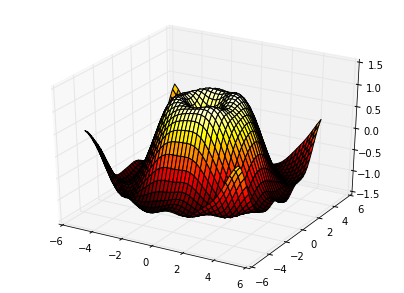

In [22]:
f1 = SVR(kernel='rbf').fit(np.vstack(np.array([X, Y]).T), np.hstack(Z))

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Zf1 = f1.predict(np.vstack(np.array([X, Y]).T))

fig = plt.figure(figsize=(7, 5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Zf1.reshape(40, 40), rstride=1, cstride=1, cmap=cm.hot)
plt.show()

### Делаем из бустинка конфетку

In [26]:
?AdaBoostRegressor

- Переобучается ли бустинг в случае переобучения одного базового алгоритма?
- Как регуляризовывать бустинг?
    - Регуляризуем базовые алгоритмы
    - $$\sum_{j=0}^{i-1} a_j b_j (x) + v \cdot a_i b_i(x), 0 < v < 1$$
- Какие функции потерь использовать?

In [24]:
from sklearn.linear_model import LogisticRegression

In [28]:
# ====================================
#       Ячейка интерактива
# ====================================

f1 = AdaBoostRegressor(
    base_estimator=LogisticRegression(), 
    loss="square",
    learning_rate=0.6, 
    n_estimators=5
).fit(np.vstack(np.array([X, Y]).T), np.hstack(Z))

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Zf1 = f1.predict(np.vstack(np.array([X, Y]).T))

fig = plt.figure(figsize=(7, 5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Zf1.reshape(40, 40), rstride=1, cstride=1, cmap=cm.hot)

ValueError: Unknown label type: array([ 0.67071982, -0.83481426, -0.63785826, ..., -0.61261671,
        0.61349474,  0.77464255])

<h1 align="center">Real Data</h1> 

In [12]:
import os
if not (os.path.exists('./data/cifar10') and os.path.exists('./data/adult.data')):
    !sh ./get_data.sh

In [13]:
adult = pd.read_csv(
    './data/adult.data', 
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"], 
    header=None, na_values="?")
adult = pd.get_dummies(adult)
adult["Target"] = adult["Target_ >50K"]

In [14]:
X, y = adult[adult.columns[:-3]].values, adult[adult.columns[-1]].values

### Gradient Boosting vs Stochastic Gradient Boosting

In [15]:
import warnings
warnings.simplefilter('ignore')
from sklearn.cross_validation import cross_val_score

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
print cross_val_score(clf1, X, y, cv=4, n_jobs=4)

[ 0.84694755  0.84594595  0.85085995  0.84496314]


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier()
print cross_val_score(clf1, X, y, cv=4, n_jobs=4)

[ 0.86426729  0.86289926  0.86916462  0.86891892]


In [ ]:
?GradientBoostingClassifier

In [18]:
clf1 = GradientBoostingClassifier(subsample=0.8)
print cross_val_score(clf1, X, y, cv=4, n_jobs=4)

[ 0.86316177  0.86289926  0.86805897  0.86805897]


### Gradient Boosting and a lot of features

In [19]:
from utils import load_CIFAR10
from sklearn.metrics import accuracy_score

In [20]:
X_train, y_train, X_test, y_test = load_CIFAR10('./data/cifar10/cifar-10-batches-py')

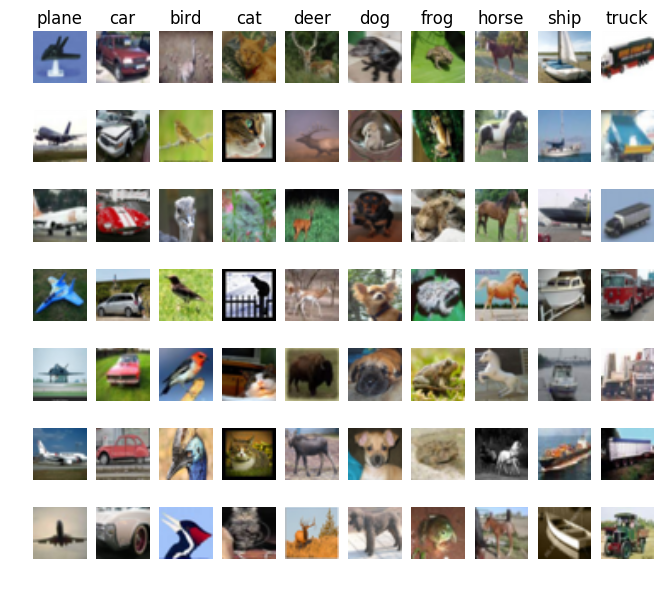

In [21]:
plt.figure(figsize=(8, 7))
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [22]:
X_train, X_test = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

In [23]:
# ===========================================
#  Даже не пытйтесь это учить. Почему??!!
# ===========================================

#clf1 = GradientBoostingClassifier(subsample=0.3, learning_rate=0.05, n_estimators=10).fit(X_train, y_train)
#print accuracy_score(clf1.predict(X_train), y_train), accuracy_score(clf1.predict(X_test), y_test)

In [24]:
from sklearn.decomposition import PCA

In [25]:
transform = PCA(n_components=100, copy=False)
X_ = transform.fit(X_train[:2000, :])
X_tr, X_te = transform.transform(X_train), transform.transform(X_test)

In [26]:
clf1 = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05, n_estimators=100).fit(X_tr[:3000], y_train[:3000])
print accuracy_score(clf1.predict(X_tr), y_train), accuracy_score(clf1.predict(X_te), y_test)

0.35768 0.3289


### Будет ли лучше если вычесть среднюю картинку?

In [27]:
mean = X_train.mean(axis=0)

In [28]:
transform = PCA(n_components=100, copy=False)
X_ = transform.fit(X_train[:2000, :]-mean)

In [29]:
X_tr, X_te = transform.transform(X_train-mean), transform.transform(X_test-mean)

In [30]:
clf1 = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05, n_estimators=100).fit(X_tr[:3000], y_train[:3000])
print accuracy_score(clf1.predict(X_tr), y_train), accuracy_score(clf1.predict(X_te), y_test)

0.35782 0.3213


### Length of dataset

In [31]:
transform = PCA(n_components=100, copy=False)
X_ = transform.fit(X_train[:2000, :])
X_tr, X_te = transform.transform(X_train), transform.transform(X_test)

In [32]:
Is, As = [], []
for i in [300, 700, 1000]:#, 3000, 5000, 10000, 20000, 40000]:
    %time clf1 = GradientBoostingClassifier(subsample=0.8, learning_rate=0.1,n_estimators=200).fit(X_tr[:i], y_train[:i])
    print '#num_items', i, 'test', accuracy_score(clf1.predict(X_te), y_test), '\n'
    Is.append(i)
    As.append(accuracy_score(clf1.predict(X_te), y_test))

CPU times: user 5.16 s, sys: 52.1 ms, total: 5.21 s
Wall time: 5.25 s
#num_items 300 test 0.167 

CPU times: user 12.9 s, sys: 26.2 ms, total: 12.9 s
Wall time: 13 s
#num_items 700 test 0.1673 

CPU times: user 18.1 s, sys: 37.2 ms, total: 18.2 s
Wall time: 18.2 s
#num_items 1000 test 0.1819 



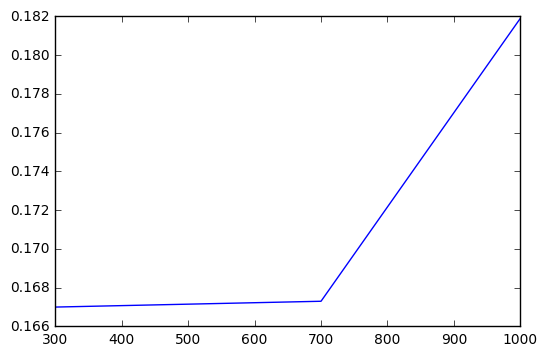

In [33]:
pylab.plot(Is, As)

<h1 align="center">eXtreme Gradient Boosting vs sklearn</h1> 

In [34]:
import xgboost as xgb

In [35]:
%%time
i = 5000
clf1 = GradientBoostingClassifier(subsample=0.8, learning_rate=0.1,n_estimators=200).fit(X_tr[:i], y_train[:i])
print 'test', accuracy_score(clf1.predict(X_te), y_test)

test 0.3759
CPU times: user 1min 39s, sys: 764 ms, total: 1min 40s
Wall time: 1min 41s


In [36]:
?xgb.XGBClassifier

In [ ]:
%%time
i = 5000
clf1 = xgb.XGBClassifier(subsample=0.8, learning_rate=0.1,n_estimators=200).fit(X_tr[:i], y_train[:i])
print 'test', accuracy_score(clf1.predict(X_te), y_test)

test 0.3934
CPU times: user 1min 27s, sys: 2.39 s, total: 1min 29s
Wall time: 25.2 s


Качество лучше, работает быстрее. Иногда проигрывает RGBM, надо пробовать. 

Итак, градиентный бустинг в XGBoost имеет ряд важных особенностей.
1. Базовый алгоритм приближает направление, посчитанное с учетом вторых производных функции потерь.
2. Отклонение направления, построенного базовым алгоритмом, измеряется с помощью модифицированного функционала — из него удалено деление на вторую производную, за счет чего избегаются численные проблемы.
3. Функционал регуляризуется -- добавляются штрафы за количество листьев и за норму коэффициентов.
4. При построении дерева используется критерий информативности, зависящий от оптимального вектора сдвига.
5. Критерий останова при обучении дерева также зависит от оптимального сдвига.

In [ ]:
%%time

from sklearn.grid_search import GridSearchCV

grid = {'n_estimators': [50, 100], 'max_depth': [4, 6]}
gs = GridSearchCV(xgb.XGBClassifier(), grid, scoring='accuracy', cv=2, n_jobs=4)
gs.fit(X_tr, y_train)

for a in gs.grid_scores_:
    print a.parameters, a.mean_validation_score

#### Осталось время: контест на паре, лучшее качество бустингом на сифар

<h1 align="center">Recap</h1> 

- Один из лучших методов построения композиций
- Нужно много деревьев и желательно не тысячи признаков
- Много хороших реализаций
- Плохо подходит для картинок и прочих очень понятных данных

**Что почитать**:
- Hastie, The Elements of Statistical Learning, https://goo.gl/k3wfEU, 10 Boosting and Additive Trees 337
- Соколов, Семинары по композиционным методам, https://goo.gl/sn8RyJ, http://goo.gl/ajNTQy